<a href="https://colab.research.google.com/github/Vonewman/Machine-learning-with-python/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Utility function

In [1]:
# Library of Functions for the OpenClassrooms Multivariate Exploratory Data Analysis Course

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('world_university_rankings_2016.csv', 
                            index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [4]:
original_data.columns

Index(['world_rank', 'country', 'teaching', 'international', 'research',
       'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international%', 'female%', 'male%'],
      dtype='object')

In [5]:
X = original_data[['teaching', 'international', 'research', 
       'citations', 'income', 'num_students', 'international%',
       'student_staff_ratio', 'female%', 'male%']]

X.head()

,teaching,international,research,citations,income,num_students,international%,student_staff_ratio,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,27.0,6.9,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,34.0,11.6,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,22.0,7.8,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,34.0,11.8,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,33.0,9.0,37.0,63.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               763 non-null    float64
 5   num_students         793 non-null    float64
 6   international%       790 non-null    float64
 7   student_staff_ratio  793 non-null    float64
 8   female%              736 non-null    float64
 9   male%                736 non-null    float64
dtypes: float64(10)
memory usage: 68.8+ KB


In [7]:
X.isna().sum()

teaching                0
international           0
research                0
citations               0
income                 37
num_students            7
international%         10
student_staff_ratio     7
female%                64
male%                  64
dtype: int64

In [8]:
X = X.fillna(X.mean())
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               800 non-null    float64
 5   num_students         800 non-null    float64
 6   international%       800 non-null    float64
 7   student_staff_ratio  800 non-null    float64
 8   female%              800 non-null    float64
 9   male%                800 non-null    float64
dtypes: float64(10)
memory usage: 68.8+ KB


### Standardasing the data

In [9]:
X.describe()

,teaching,international,research,citations,income,num_students,international%,student_staff_ratio,female%,male%
count,800.0000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,31.5840,48.500375,28.128625,51.30975,46.869594,24161.264817,12.702532,19.116393,49.538043,50.461957
std,14.9854,23.690816,19.532270,27.04544,20.094099,22470.143414,10.609056,12.467030,11.473152,11.473152
min,9.9000,7.100000,2.900000,1.20000,28.000000,462.000000,0.000000,0.600000,1.000000,0.000000
25%,21.0000,29.450000,14.350000,27.52500,31.800000,12344.000000,5.000000,12.300000,46.000000,44.000000
50%,27.0000,45.700000,22.100000,50.30000,39.900000,20307.000000,10.000000,16.850000,51.000000,49.000000
75%,37.5000,65.450000,35.525000,74.90000,53.700000,29640.500000,18.000000,22.225000,56.000000,54.000000
max,95.6000,99.900000,99.000000,100.00000,100.000000,379231.000000,82.000000,162.600000,100.000000,99.000000


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ..., -0.98050904,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ..., -0.60327885,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ..., -0.90827347,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -1.23734662,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.56314797,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ...,  0.11907685,
        -0.57021242,  0.57021242]])

In [11]:
pd.DataFrame(X_scaled, columns=X.columns).describe().round(2)

,teaching,international,research,citations,income,num_students,international%,student_staff_ratio,female%,male%
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.75,-1.29,-1.85,-0.94,-1.06,-1.20,-1.49,-4.23,-4.40
25%,-0.71,-0.80,-0.71,-0.88,-0.75,-0.53,-0.73,-0.55,-0.31,-0.56
50%,-0.31,-0.12,-0.31,-0.04,-0.35,-0.17,-0.25,-0.18,0.13,-0.13
75%,0.40,0.72,0.38,0.87,0.34,0.24,0.50,0.25,0.56,0.31
max,4.27,2.17,3.63,1.80,2.65,15.81,6.54,11.52,4.40,4.23


In [12]:
from sklearn.decomposition import PCA

num_components = 10

pca = PCA(n_components=num_components)

pca.fit(X_scaled)

PCA(n_components=10)

## Analyse the results

### Explained variance ratio

In [13]:
pca.explained_variance_ratio_.round(2)

array([0.32, 0.24, 0.16, 0.11, 0.07, 0.05, 0.04, 0.01, 0.01, 0.  ])

In [14]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.32, 0.56, 0.71, 0.82, 0.89, 0.94, 0.98, 0.99, 1.  , 1.  ])

### Scree Plot

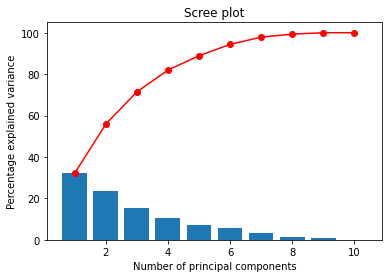

In [15]:
display_scree_plot(pca)

In [17]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
# etc

In [18]:
X.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'international%', 'student_staff_ratio', 'female%',
       'male%'],
      dtype='object')

In [19]:
pc1

array([ 0.44602246,  0.41763286,  0.47918623,  0.4372045 ,  0.17746079,
       -0.06111775,  0.39562507, -0.0565289 ,  0.07394972, -0.07394972])

In [20]:
pc2

array([-0.17388542,  0.17493695, -0.14625   ,  0.0530956 , -0.28297188,
        0.2070367 ,  0.09335706,  0.21899687,  0.60635809, -0.60635809])

### Correlation Circle

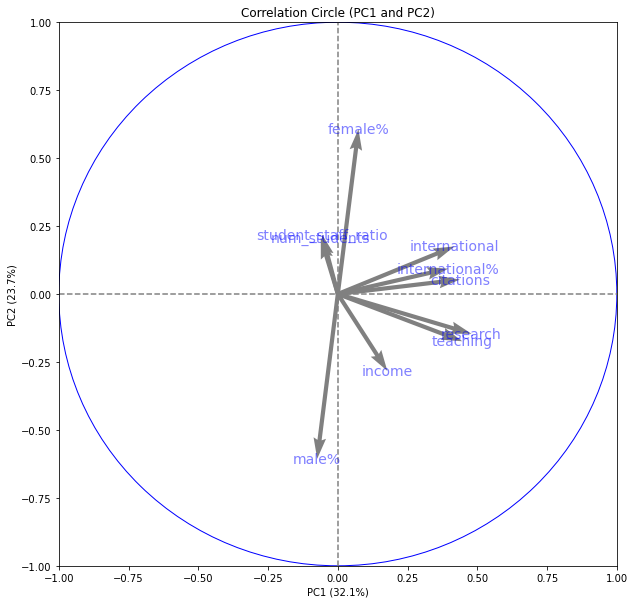

In [21]:
# Generate a correlation circle
pcs = pca.components_
display_circles(pcs, num_components, pca, [(0, 1)], labels=np.array(X.columns), )

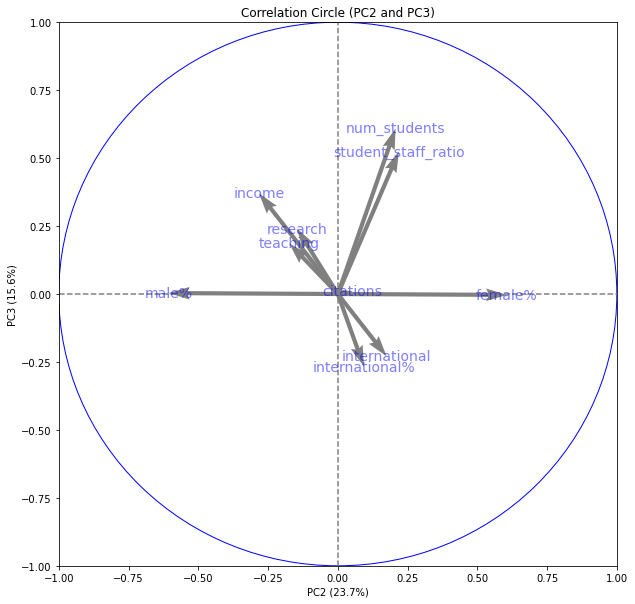

In [22]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(X.columns),) 

### Individuals Factor Map

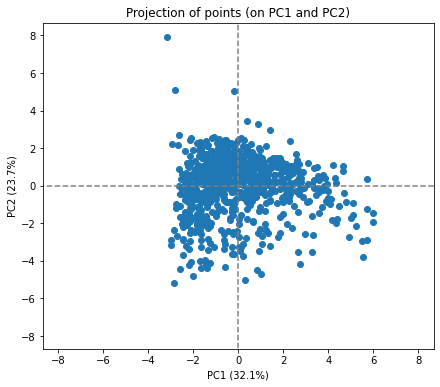

In [23]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

In [24]:
# Take a copy of the data an add a new column for the banding
classed_data = original_data.copy()
append_class(classed_data, 'rank_band','world_rank',[0,11,101,1000],['10','100','1000'])

# Get a list of the new bandings that we can pass to the plot
classed_data = classed_data.reset_index()
rank_band = [classed_data.loc[uni_id, "rank_band"] for uni_id in range(0,len(X_scaled))]

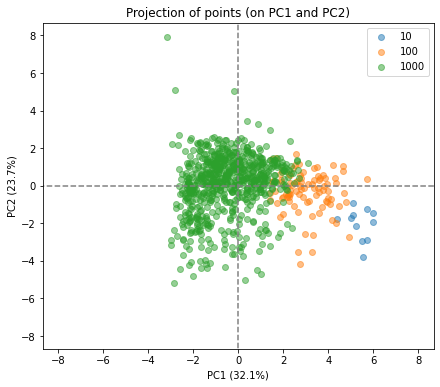

In [25]:
# Transform the original scaled data to the new vector space and display data points
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = rank_band, alpha = 0.5)

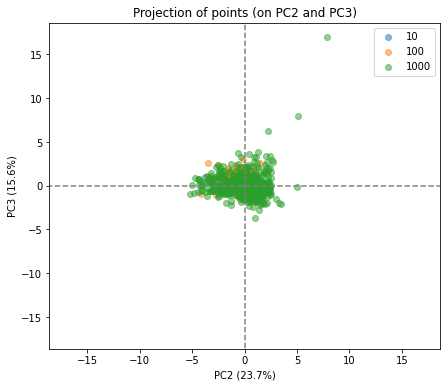

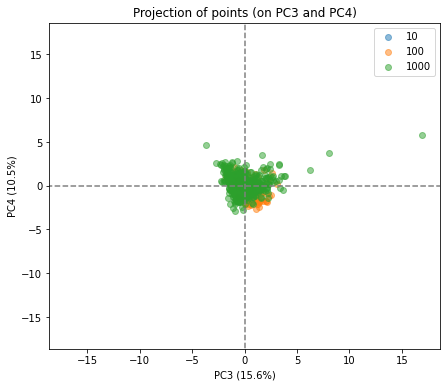

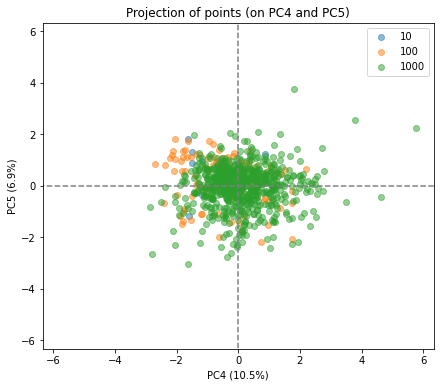

In [26]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(1,2),(2,3),(3,4)], illustrative_var = rank_band, alpha = 0.5)